# Problem Statement
A mobile phone manufacturer in the US, a new entrant in the market, wants to gain insights into their competitors and customer preferences. By analyzing market data, they aim to design better products and refine their marketing strategies. Their objective is to close the demand-supply gap, increase market share, and enhance brand value by identifying features that resonate with users and understanding competitors' strengths and weaknesses. Your task, as a data analytics provider, is to provide actionable insights that will guide their product development and marketing efforts.

## **I. Data Reading, Understanding and Processing**

In [1]:
# Importing drive to upload dataset
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# importing libraries all the required libraries
import ast
import gzip
import json # This will be required while reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import shutil

from datetime import datetime, timedelta
from imblearn import over_sampling
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud, STOPWORDS

# Importing warnings
import warnings
warnings.filterwarnings("ignore")

The following data sets are available
meta data of type .json

The meta data holds information from sellers point of view and the phone data holds user information. We begin by unzipping the meta data file and extracting its content to a list

# Reading the  data:

In this step, we will unzip the meta data and store it in a list so we can understand the data in a better format & work with it

In [3]:
# Path to the meta data zip file
path1 = '/content/gdrive/MyDrive/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/gdrive/MyDrive/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories-001.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [4]:
# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [5]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [6]:
# Converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

In [7]:
# Reading the .csv file of the phone data into a dataframe
df_phonedata = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')

In [8]:
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


# Data pre-processing - meta data



In [9]:
# Printing the shape of the metadata
df_meta.shape

(590071, 18)

In [10]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [11]:
df_meta['details'][2]

{'Publisher:': 'juduiou',
 'ASIN:': '6310200240',
 '\n    Product Dimensions: \n    ': '11.5 x 1.1 x 5.8 inches',
 'Shipping Weight:': '1 ounces'}

In [12]:
# Printing the head of the dataframe
print(df_meta['category'][36])
print(df_meta['category'][0])

['Cell Phones & Accessories', 'Cell Phones', 'Unlocked Cell Phones']
['Cell Phones & Accessories', 'Accessories', 'Screen Protectors']


In [13]:
# Checking for null values in each column
df_meta.isnull().sum()

,0
category,0
tech1,0
description,0
fit,0
title,0
also_buy,0
image,0
tech2,0
brand,0
feature,0


In [14]:
# Creating a column 'specific_category' that tells whether the product is Cell Phones/Accesories category
df_meta['specific_category']=df_meta['category'].apply(lambda x : x[1] if len(x) > 2 else 'unknown')

In [15]:
df_meta['specific_category'].head()

,specific_category
0,Accessories
1,Accessories
2,unknown
3,"Cases, Holsters & Sleeves"
4,unknown


In [16]:
# Creating a new dataframe for cellphones only
df_meta_cell=df_meta.loc[df_meta['specific_category']=='Cell Phones']

In [17]:
df_meta_cell.head(2)

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,specific_category
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,Cell Phones


In [18]:
print(df_meta_cell.iloc[0]['feature'])

['2G NETWORK, Quad Band: GSM 850/900/1800/1900 MHZ', 'Dual SIM cards dual standby Super big keyboard, Helpful Emergency call dial key', 'Support MICRO SD extend to 4GB max,Support SMS Text Messaging MMS, E-Mail, Instant Messaging', 'APLICATIONS: MAGNIFIER FACEBOOK CALCULATOR CURRENCY CONVERTER STOPWATCH', 'FACTORY UNLOCKED, Language: English, French, Spanish, Portuguese, Dimension, 110*46*16']


In [19]:
df_meta_cell.shape

(9685, 19)

In [20]:
df3=df_meta_cell.loc[(df_meta_cell.brand=='Apple') & (df_meta_cell.price!='')]

In [21]:
df3.loc[df3.brand=="Apple"]

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,specific_category
19344,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[, This update to the original iPhone adds 3G ...",,Apple iPhone 3GS 16GB GSM Factory Unlocked Sma...,"[B001TC6NPE, B006GLRAFA, B001UBB9GM, B008VUNRZ...",[https://images-na.ssl-images-amazon.com/image...,,Apple,[2G Network GSM 850 / 900 / 1800 / 1900 3G Net...,"[>#392,806 in Cell Phones & Accessories (See T...","[B008VUNRZQ, B001UBB9GM, B002QSV6DY, B00YD53QA...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$93.10,B002EISPQW,Cell Phones
21699,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[iPhone 3GS has 3.5-inch display screen, givin...",,iPhone 3GS 32 GB - Unlocked,"[B0055AGUMW, B006W9YRC0, B01G8AQF1S, B004ZLV4CI]",[],,Apple,[GSM Unlocked 2G Network GSM 850 / 900 / 1800 ...,"[>#369,032 in Cell Phones & Accessories (See T...","[B008VUNRZQ, B005ZD6WQS, B004ZLV5AY, B002EISPQ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$114.19,B002QSV6DY,Cell Phones
27816,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[, The iPhone 5c puts all of the features of t...",,"Apple iPhone 5C 16 GB Unlocked, Green","[B00SHYBVCW, B00NHXIFRM, B00F3ISEUC, B00PGHRWA...",[https://images-na.ssl-images-amazon.com/image...,,Apple,"[CPU Dual-core 1.3 GHz Swift (ARM v7-based), G...","[>#124,568 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$27.57,B003PJBWOQ,Cell Phones
307412,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[, <b>Display </b>, <b>iSight Camera</b>, <b>V...",,"Apple iPhone 6 Plus 128 GB Unlocked, Silver","[B01KLNJF7O, B00NG732OU, B07BF5PRR8, B01AD0QD3...",[https://images-na.ssl-images-amazon.com/image...,,Apple,"[2G: GSM 850 / 900 / 1800 / 1900, 3G: HSDPA 85...","[>#213,810 in Cell Phones & Accessories (See T...","[B00UAP9UW4, B00YD54J8W, B00YD54N24, B00YD54HZ...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$550.78,B00NQGOOJI,Cell Phones
311941,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[The iPhone 6 64GB Gold, available from The Ph...",,"Apple iPhone 6, GSM Unlocked, 64GB - Gold (Ref...","[B00YD548Q0, B01KBQ6I3A, B00YD549VE, B01M1214G...",[https://images-na.ssl-images-amazon.com/image...,,Apple,[Renewed products look and work like new. Thes...,"285,102 in Cell Phones & Accessories (","[B01CR1FQMG, B01J2T8JKC, B00YD548Q0, B01C62I49...","{'Shipping Weight:': '8 ounces (', 'Domestic S...",Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$219.99,B00O1AWVX4,Cell Phones
357990,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[The Apple iPhone 6 comes with a 4.7 inch scre...,,"Apple iPhone 6, GSM Unlocked, 64GB - (Refurbis...","[B00YD54AYU, B01KBQ6I3A, B00YD549VE, B00YD548Q...",[https://images-na.ssl-images-amazon.com/image...,,Apple,[Renewed products look and work like new. Thes...,"[>#75,012 in Cell Phones & Accessories (See To...",[],{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$59.42,B00S5HM60M,Cell Phones
361435,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[This iPhone 5S includes an H2O Wireless SIM c...,,Apple iPhone 5S 32GB Unlocked GSM Smartphone -...,"[B017UP4SUA, B012KEIPGO, B01BI2VZEI, B00WZR5UR...",[https://images-na.ssl-images-amazon.com/image...,,Apple,"[2G: GSM 850 / 900 / 1800 / 1900, 3G: HSDPA 85...","[>#70,271 in Cell Phones & Accessories (See To...","[B06XRBLKM3, B00YD5400Y, B00YD543VU, B071HYPM5...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$119.99,B00SHZNEJ4,Cell Phones
373035,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[Apple iPhone 6 Unlocked Smartphone, Silver, 6...",,Apple iPhone 6 64GB Factory Unlocked GSM 4G LT...,[],[https://images-na.ssl-images-amazon.com/image...,,Apple,[Re

In [22]:
# Dropping the duplicate entries based on the asin
df_meta_cell.drop_duplicates(subset='asin',keep='first',inplace=True)

In [23]:
df_meta_cell.shape

(9652, 19)

In [24]:
# Extracting only brands and asin from df_meta_cell. This will be used for dashboarding later.
df_brand_asin=df_meta_cell[['asin','brand']]

In [25]:
# Writing the dataframe df_brand_asin into a csv file
df_brand_asin.to_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics/Brands and Asins.csv', index = False) #Saving Brands and their Asins

# Data pre-processing - phone data

In [26]:
df_phonedata.shape

(1128437, 12)

In [27]:
df_phonedata.head(2)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE


In [28]:
df_phonedata.overall.value_counts()

,count
overall,
5.0,707038
4.0,184431
3.0,98254
1.0,81539
2.0,57175


In [29]:
# Getting null value counts for each column
df_phonedata.isnull().sum()

,0
overall,0
verified,0
reviewerID,0
asin,0
style,523196
reviewerName,202
reviewText,830
summary,539
unixReviewTime,0
vote,1036403


In [30]:
# Dropping columns with null reviews
df_phonedata=df_phonedata[~df_phonedata['reviewText'].isnull()]

In [31]:
# Let's check null values
df_phonedata.reviewText.isnull().sum()

0

In [32]:
df_phonedata.shape

(1127607, 12)

In [33]:
# Extracting the cell phones with asins that are present in meta data as well
asin_common=df_phonedata['asin'].isin (df_meta_cell['asin'])

In [34]:
df_phonedata=df_phonedata[asin_common]

# Data pre-processing - merging phone data and meta data

In [35]:
# Left join of phone data and meta data on 'asin' values
df_phone_meta = pd.merge(df_phonedata, df_meta_cell, on='asin', how = 'left')

In [36]:
df_phone_meta.shape

(62087, 30)

In [37]:
# Printing the columns of the dataframe
df_phone_meta.columns

Index(['overall', 'verified', 'reviewerID', 'asin', 'style', 'reviewerName',
       'reviewText', 'summary', 'unixReviewTime', 'vote', 'image_x',
       'review_sentiment', 'category', 'tech1', 'description', 'fit', 'title',
       'also_buy', 'image_y', 'tech2', 'brand', 'feature', 'rank', 'also_view',
       'details', 'main_cat', 'similar_item', 'date', 'price',
       'specific_category'],
      dtype='object')

In [38]:
# Only taking columns which are useful to us
dff_phone_meta = df_phone_meta[['overall', 'verified', 'reviewerID', 'asin', 'reviewText', 'asin', 'unixReviewTime', 'category', 'also_view', 'brand', 'price','review_sentiment']]
dff_phone_meta.to_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics/phone_reviews.csv', index = False)

In [39]:
dff_phone_meta.shape

(62087, 12)

In [40]:
dff_phone_meta.head()

,overall,verified,reviewerID,asin,reviewText,asin,unixReviewTime,category,also_view,brand,price,review_sentiment
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,B0000E3GWH,1095724800,"[Cell Phones & Accessories, Cell Phones, Carri...",[],Samsung,,NEGATIVE
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,B0000E3GWH,1090627200,"[Cell Phones & Accessories, Cell Phones, Carri...",[],Samsung,,POSITIVE
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,B0000E3GWH,1089072000,"[Cell Phones & Accessories, Cell Phones, Carri...",[],Samsung,,NEGATIVE
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,"..and I'm from Europe, where the phones and ne...",B0000E3GWH,1081728000,"[Cell Phones & Accessories, Cell Phones, Carri...",[],Samsung,,POSITIVE
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,B0000E3GWH,1077148800,"[Cell Phones & Accessories, Cell Phones, Carri...",[],Samsung,,POSITIVE


In [41]:
dff_phone_meta.isnull().sum()

,0
overall,0
verified,0
reviewerID,0
asin,0
reviewText,0
asin,0
unixReviewTime,0
category,0
also_view,0
brand,0


In [42]:
df2= dff_phone_meta.loc[(dff_phone_meta.price!='')]

In [43]:
df2.shape

(28381, 12)

In [44]:
df3=dff_phone_meta.loc[(dff_phone_meta.brand=='Apple') & (dff_phone_meta.price!='')]

In [45]:
df3.iloc[100:120]

,overall,verified,reviewerID,asin,reviewText,asin,unixReviewTime,category,also_view,brand,price,review_sentiment
2827,5.0,True,A2ZLA5P2JUQ4B2,B003PJBWOQ,excellent,B003PJBWOQ,1425081600,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2828,5.0,True,A3K9OXY23ECBD8,B003PJBWOQ,"gift for my daughter, she loves it",B003PJBWOQ,1424390400,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,NEGATIVE
2829,5.0,True,A302478VVXFGF9,B003PJBWOQ,excellent,B003PJBWOQ,1423785600,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2830,5.0,True,A21BXOH3U3Q2D3,B003PJBWOQ,Love the phone - glad I got it! I like it bett...,B003PJBWOQ,1423526400,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2831,4.0,True,A3NXP6DNMAAN9Z,B003PJBWOQ,"bought this as a gift for my mom's bday, she a...",B003PJBWOQ,1422662400,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2832,4.0,True,A2K7134CRT39ZC,B003PJBWOQ,Great phone my girl love this phone ...,B003PJBWOQ,1422576000,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2833,5.0,True,A16KDIITDPF59Z,B003PJBWOQ,Everything was as expected. Working well here ...,B003PJBWOQ,1421107200,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,NEGATIVE
2834,5.0,True,A3M7GVD5651EF4,B003PJBWOQ,So far so good,B003PJBWOQ,1420675200,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2835,5.0,True,A5P3WGJMFVE8W,B003PJBWOQ,Great phone of course a bit pricey but great.,B003PJBWOQ,1420502400,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE
2836,4.0,True,ATR6961X83NJ5,B003PJBWOQ,The phone was perfect just as described. But w...,B003PJBWOQ,1419724800,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$27.57,POSITIVE


In [46]:
pd.reset_option("max_columns")
# Accessing the 'price' column
df3['price']

,price
2006,$93.10
2007,$93.10
2008,$93.10
2009,$93.10
2010,$93.10
...,...
61622,$54.99
61984,$308.77
61987,$399.99
62032,$59.16


In [47]:
df3.loc[2837,"reviewText"]

"The phone was more banged up than I expected but it's fully functional."

In [48]:
df3

,overall,verified,reviewerID,asin,reviewText,asin,unixReviewTime,category,also_view,brand,price,review_sentiment
2006,5.0,True,A2UKU3YRLE2E3V,B002EISPQW,excelente,B002EISPQW,1449705600,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B008VUNRZQ, B001UBB9GM, B002QSV6DY, B00YD53QA...",Apple,$93.10,NEGATIVE
2007,5.0,True,A268E6G2E09V1T,B002EISPQW,very good item. thank you,B002EISPQW,1428278400,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B008VUNRZQ, B001UBB9GM, B002QSV6DY, B00YD53QA...",Apple,$93.10,POSITIVE
2008,3.0,True,A17EA1VGUMXL13,B002EISPQW,"The cellphone is not white, does not have the ...",B002EISPQW,1410134400,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B008VUNRZQ, B001UBB9GM, B002QSV6DY, B00YD53QA...",Apple,$93.10,NEGATIVE
2009,4.0,True,A1Y6ZM2LQP32YO,B002EISPQW,thank you,B002EISPQW,1407456000,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B008VUNRZQ, B001UBB9GM, B002QSV6DY, B00YD53QA...",Apple,$93.10,NEGATIVE
2010,1.0,True,AQ1OC5QLUIVA9,B002EISPQW,"It is nood a good phone, why? because his syst...",B002EISPQW,1386720000,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B008VUNRZQ, B001UBB9GM, B002QSV6DY, B00YD53QA...",Apple,$93.10,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
61622,5.0,True,A1Z81QEPPRFS8D,B00ZVNQAA0,Great phone. My son loves it,B00ZVNQAA0,1517443200,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B07KCJCCJX, B00WZR5URO, B00WZR5ULU, B00YD5400...",Apple,$54.99,POSITIVE
61984,4.0,True,A3F5JU5ZA05AIM,B01DAJQGMS,I was intrigued with a small screen smartphone...,B01DAJQGMS,1537833600,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B01L1BOQUQ, B01GXAZFR8, B01L1BOQTW, B0751RGH6...",Apple,$308.77,POSITIVE
61987,5.0,True,AGI34T5QZWBBC,B01DC453ES,Got this phone today and I LOVE IT! I was upg...,B01DC453ES,1535155200,"[Cell Phones & Accessories, Cell Phones, Unloc...","[B01D5BYQWS, B01MU11Z7W, B07D1CPRBN, B07D1CD34...",Apple,$399.99,POSITIVE
62032,5.0,True,A31FYGE53VGBH7,B01EVMZMZU,"Like a new cellphone, I am very happy with my ...",B01EVMZMZU,1534204800,"[Cell Phones & Accessories, Cell Phones, Unloc...",[],Apple,$59.16,POSITIVE


In [49]:
df3.loc[2840,"reviewText"]

'It was bought for my daughter, she loves it.'

In [50]:
df3.loc[2840,"price"]

'$27.57'

In [51]:
# Reading the merged data --> phone data + metadata
phone_data = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics/phone_reviews.csv')

In [52]:
# Reading the phone reviews text into a list
phone_review = phone_data['reviewText']

In [53]:
phone_data['reviewText'].isnull().sum()

0

# Removing punctuations/special characters

In [54]:
# Creating a list 'cleaned_review' to store all reviews with punctuations removed
cleaned_review = []
for review in range(0, len(phone_review)):
    # Remove all the special characters
    processed_review = re.sub(r'[^\w\d\'\s]+', ' ', str(phone_review[review]))

    # remove all single characters
    processed_review = re.sub(r'\s+[a-zA-Z]\s+\n', ' ', processed_review)

    # Remove single characters from the start
    processed_review = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_review)

    # Substituting multiple spaces with single space
    processed_review= re.sub(r'\s+', ' ', processed_review, flags=re.I)

    # Removing prefixed 'b'
    processed_review = re.sub(r'^b\s+', '', processed_review)

    # Converting to Lowercase
    processed_review = processed_review.lower()

    cleaned_review.append(processed_review)

len(cleaned_review)

62087

# Removing stopwords

In [55]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web_and_social_media_analytics/stop_words_long.txt')]
len(stop_words)

399

In [56]:
# Removing stop words from all reviews

no_stopwords_review = []  #the list which holds the final cleaned review

for review in cleaned_review:
    word_tokens = review.split() #Tokenization
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    # Appending the list of filtered words
    no_stopwords_review.append(' '.join(filtered_sentence))

In [57]:
# Adding the cleaned reviews to the data frame phone_data
phone_data['cleaned_reviewText'] = no_stopwords_review

In [58]:
# Printing the data type of the columns
phone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62087 entries, 0 to 62086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   overall             62087 non-null  float64
 1   verified            62087 non-null  bool   
 2   reviewerID          62087 non-null  object 
 3   asin                62087 non-null  object 
 4   reviewText          62087 non-null  object 
 5   asin.1              62087 non-null  object 
 6   unixReviewTime      62087 non-null  int64  
 7   category            62087 non-null  object 
 8   also_view           62087 non-null  object 
 9   brand               62021 non-null  object 
 10  price               28381 non-null  object 
 11  review_sentiment    62087 non-null  object 
 12  cleaned_reviewText  62087 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 5.7+ MB


In [59]:
# Cleaned reviews are of object type which means there are some blank reviews after cleaning. To remove that,
phone_data=phone_data.loc[~(phone_data['cleaned_reviewText']=='')]

In [60]:
phone_data.shape

(61942, 13)

In [61]:
# Writing the dataframe phone_data into a csv file
phone_data.to_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics/review_sentiment.csv",index = False)

## **II. Feature Extraction**

# Importing libraries and reading the data

In [62]:
# Reading the data
phone_data = pd.read_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics/review_sentiment.csv")

In [63]:
phone_data.columns

Index(['overall', 'verified', 'reviewerID', 'asin', 'reviewText', 'asin.1',
       'unixReviewTime', 'category', 'also_view', 'brand', 'price',
       'review_sentiment', 'cleaned_reviewText'],
      dtype='object')

In [64]:
# Extracting only the required columns
phone_data_col = phone_data[['overall', 'verified', 'unixReviewTime', 'reviewerID',
       'asin', 'reviewText', 'category', 'also_view','brand', 'price', 'cleaned_reviewText','review_sentiment']]

# Converting Unix Review Time to Date-Time format

In [65]:
# Transforming unixReview time to date time format
phone_data_col['Date&Time'] = phone_data_col['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))

In [66]:
phone_data_col.head()

,overall,verified,unixReviewTime,reviewerID,asin,reviewText,category,also_view,brand,price,cleaned_reviewText,review_sentiment,Date&Time
0,1.0,False,1095724800,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,2004-09-20
1,4.0,False,1090627200,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,2004-07-23
2,3.0,False,1089072000,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,2004-07-05
3,5.0,True,1081728000,A1V3TRGWOMA8LC,B0000E3GWH,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,2004-04-11
4,3.0,False,1077148800,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,2004-02-18


# Finding the "also viewed" phones and their brands for each of the phones

In [67]:
# Function that takes intersection of also viewed asins in phone data and the asins in meta data
def intersection(lst1, lst2_set):
    return [value for value in lst1 if value in lst2_set]

# Load the data
data_brand_asin = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics/Brands and Asins.csv')

# Convert all_asins to a set for faster lookup
all_asins_set = set(data_brand_asin['asin'])

# Function to extract intersected ASINs for each entry
def extract_intersected(also_viewed_str):
    also_viewed_lst = ast.literal_eval(also_viewed_str)
    return intersection(also_viewed_lst, all_asins_set)

# Apply the function to the 'also_view' column and create a new column 'also_viewed_phones'
phone_data_col = phone_data_col.copy()  # Avoid modifying original DataFrame
phone_data_col['also_viewed_phones'] = phone_data_col['also_view'].apply(extract_intersected)

In [68]:
# Get brands of the also viewed asins

dictionary_of_brands_asins = data_brand_asin.set_index('asin')['brand'].to_dict()
also_viewed_brand = []
for also_viewed_phones in phone_data_col["also_viewed_phones"]:
    also_viewed_brand.append([dictionary_of_brands_asins.get(e,'') for e in also_viewed_phones])
phone_data_col = phone_data_col.copy()
phone_data_col['also_viewed_brand'] = also_viewed_brand

In [69]:
phone_data_col.head()

,overall,verified,unixReviewTime,reviewerID,asin,reviewText,category,also_view,brand,price,cleaned_reviewText,review_sentiment,Date&Time,also_viewed_phones,also_viewed_brand
0,1.0,False,1095724800,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,2004-09-20,[],[]
1,4.0,False,1090627200,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,2004-07-23,[],[]
2,3.0,False,1089072000,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,2004-07-05,[],[]
3,5.0,True,1081728000,A1V3TRGWOMA8LC,B0000E3GWH,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,2004-04-11,[],[]
4,3.0,False,1077148800,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,2004-02-18,[],[]


In [70]:
# Save the phone_data_col dataframe having the also viewed brands to a csv
phone_data_col.to_csv("/content/gdrive/MyDrive/Web_and_social_media_analytics/phone_data_final.csv")

# Getting the number of reviews for each brand

In [71]:
# Getting review count of each brand
dict_brands=phone_data_col['brand'].value_counts().to_dict()
dict_brands

{'Samsung': 15946,
 'BLU': 9142,
 'LG': 6513,
 'Motorola': 4794,
 'Nokia': 4377,
 'BlackBerry': 3643,
 'Apple': 3639,
 'HTC': 2425,
 'Sony': 1545,
 'Huawei': 1393,
 'Asus': 786,
 'ZTE': 623,
 'Tracfone': 620,
 'Alcatel': 506,
 'Posh Mobile': 394,
 'LGIC': 366,
 'Kyocera': 267,
 'Lenovo': 252,
 'Pantech': 229,
 'Microsoft': 223,
 'Palm': 214,
 'TRACFONE WIRELESS, INC.': 208,
 'Raytine': 190,
 'AT&T': 189,
 'RCA': 186,
 'MOTCB': 179,
 'Sony Ericsson': 162,
 'Samsung Korea': 143,
 'CT-Miami LLC': 134,
 'SHARKK': 131,
 'Nextbit': 114,
 'T-Mobile': 105,
 'GreatCall': 99,
 'Star': 98,
 'Casio': 77,
 'Sharp': 72,
 'OnePlus': 69,
 'verykool': 65,
 'Google': 60,
 'Sanyo': 57,
 'DOOGEE': 54,
 'TokyoSlurpKINGS': 50,
 'ZTE USA': 48,
 'Caterpillar': 48,
 'Dell': 39,
 'SKY Devices': 39,
 'SVP': 39,
 'Tracone': 38,
 'TNSO': 35,
 'JIAKE': 35,
 'Generic': 33,
 'Polaroid': 32,
 'CUBOT': 32,
 'Verizon': 32,
 'Jabra': 31,
 'Sidekick': 31,
 'Moto X': 29,
 'SoonerSoft Electronics': 29,
 'Jitterbug': 27,
 'H

In [72]:
# Club reviews which are less than 1000 reviews
dict_brands_filtered = {}
sum = 0
for key, value in dict_brands.items():
    if value > 1000:
        dict_brands_filtered[key] = value
    else:
        sum  = sum + value
dict_brands_filtered['Others'] = sum
dict_brands_filtered

{'Samsung': 15946,
 'BLU': 9142,
 'LG': 6513,
 'Motorola': 4794,
 'Nokia': 4377,
 'BlackBerry': 3643,
 'Apple': 3639,
 'HTC': 2425,
 'Sony': 1545,
 'Huawei': 1393,
 'Others': 8459}

In [73]:
# Getting data for only those top brands which have more than 1000 reviews -- comes to 10 brands
top_10_brands = ['Samsung',
 'Motorola',
 'LG',
 'BlackBerry',
 'Nokia',
 'Apple',
 'HTC',
 'BLU',
 'Huawei',
 'Sony']
phone_data_top_10 = phone_data_col[phone_data_col.brand.isin(top_10_brands)]
phone_data_top_10 = phone_data_top_10.reset_index()

In [74]:
phone_data_top_10.head()

,index,overall,verified,unixReviewTime,reviewerID,asin,reviewText,category,also_view,brand,price,cleaned_reviewText,review_sentiment,Date&Time,also_viewed_phones,also_viewed_brand
0,0,1.0,False,1095724800,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone ugly heavy terrible user interface techi...,NEGATIVE,2004-09-20,[],[]
1,1,4.0,False,1090627200,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung v205 decided try e715 fyi people batte...,POSITIVE,2004-07-23,[],[]
2,2,3.0,False,1089072000,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,samsung phone not measure v300 am tmobile cust...,NEGATIVE,2004-07-05,[],[]
3,3,5.0,True,1081728000,A1V3TRGWOMA8LC,B0000E3GWH,"..and I'm from Europe, where the phones and ne...","['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,i'm europe phones networks better samsung curr...,POSITIVE,2004-04-11,[],[]
4,4,3.0,False,1077148800,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,phone amazingly light camera phone flashlight ...,POSITIVE,2004-02-18,[],[]


In [75]:
# Getting count of also viewed for each brand for top 10 brands
# For every purchased brand get the count of also viewed brand
brand =  phone_data_top_10['brand']

also_viewed_brands = phone_data_top_10['also_viewed_brand']
dict_also_viewed_brands = {}

for i in range(len(brand)):
    if brand[i] not in dict_also_viewed_brands:
        dict_also_viewed_brands[brand[i]] = {}
    for j in range(len(also_viewed_brands[i])):
        if also_viewed_brands[i][j] not in dict_also_viewed_brands[brand[i]]:
            dict_also_viewed_brands[brand[i]][also_viewed_brands[i][j]] = 1
        else:
            dict_also_viewed_brands[brand[i]][also_viewed_brands[i][j]] = int(dict_also_viewed_brands[brand[i]][also_viewed_brands[i][j]]) + 1

In [76]:
dict_also_viewed_brands

{'Samsung': {'LG': 14077,
  'Samsung': 132118,
  'ZTE': 4107,
  'BLU': 660,
  'BlackBerry': 1880,
  'Pantech': 1414,
  'Motorola': 5932,
  'GreatCall': 460,
  'ZTE USA': 269,
  'Kyocera': 2614,
  'Sanyo': 592,
  'Tracfone': 463,
  'LGIC': 171,
  'TRACFONE WIRELESS, INC.': 71,
  'Alcatel': 451,
  'TracFone': 29,
  'Tracone': 43,
  'Tracfone Wireless': 28,
  'Caterpillar': 51,
  'RugGear': 157,
  'Fsmart': 26,
  'AT&T': 173,
  nan: 308,
  'Nokia': 1112,
  'HTC': 2061,
  'Alcatel One Touch': 468,
  'Casio': 368,
  'Palm': 15,
  'Sudroid': 24,
  'RCA': 339,
  'Sony': 902,
  'Unknown': 39,
  'Virgin Mobile': 9,
  'MOTCB': 474,
  'Boost': 203,
  'Asus': 877,
  'T-Mobile': 85,
  'NET10': 9,
  'Straight Talk': 8,
  'Huawei': 163,
  'Google': 21,
  'Microsoft': 299,
  'Boost Mobile': 20,
  'Samsung Group': 1230,
  'Galaxy S5': 1527,
  'CAT PHONES': 11,
  'Samsung Korea': 746,
  'Jitterbug': 27,
  'Apple': 120,
  'TNSO': 289,
  'inDigi': 83,
  'Samsung/Straight Talk': 6},
 'Motorola': {'Motorola

In [77]:
df_viewed_brands = pd.DataFrame(dict_also_viewed_brands).T

In [78]:
df_viewed_brands

,LG,Samsung,ZTE,BLU,BlackBerry,Pantech,Motorola,GreatCall,ZTE USA,Kyocera,...,Porsche Design,Storm,Blackberry,Lynxx,Sharp,Cell Phone,Kocaso,Nexus,Sony Ericsson,SKY Devices
Samsung,14077.0,132118.0,4107.0,660.0,1880.0,1414.0,5932.0,460.0,269.0,2614.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Motorola,4906.0,4628.0,1455.0,301.0,1200.0,446.0,23248.0,763.0,82.0,1879.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LG,34557.0,9109.0,2043.0,683.0,1050.0,740.0,3017.0,300.0,167.0,2215.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BlackBerry,4551.0,1141.0,3428.0,691.0,45225.0,1158.0,697.0,108.0,109.0,485.0,...,401.0,171.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nokia,2537.0,1771.0,1648.0,1302.0,3791.0,653.0,506.0,151.0,157.0,453.0,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apple,28.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HTC,3453.0,2858.0,751.0,189.0,709.0,227.0,1592.0,65.0,NaN,641.0,...,NaN,NaN,NaN,5.0,47.0,14.0,NaN,NaN,NaN,NaN
BLU,963.0,1129.0,2146.0,8015.0,270.0,264.0,978.0,216.0,93.0,151.0,...,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN
Huawei,586.0,53.0,77.0,10.0,NaN,NaN,906.0,5.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN
Sony,240.0,304.0,36.0,10.0,183.0,10.0,235.0,NaN,NaN,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,18.0


In [79]:
# To get the max viewed for each top brand apart from itself
max_viewed = {}
for brand, sub_brand in dict_also_viewed_brands.items():
    also_viewed_brand = ''
    count = 0
    for top_brand, value in sub_brand.items():
        if value > count and brand != top_brand:
            count = value
            also_viewed_brand = top_brand
    max_viewed[brand]  = str(also_viewed_brand) + ' ' + str(count)
max_viewed_df = pd.DataFrame(max_viewed, index = ['top_viewed']).T
max_viewed_df.to_excel("/content/gdrive/MyDrive/Web_and_social_media_analytics/Max Viewed.xlsx", index = True)

In [80]:
max_viewed_df

,top_viewed
Samsung,LG 14077
Motorola,LG 4906
LG,Samsung 9109
BlackBerry,LG 4551
Nokia,BlackBerry 3791
Apple,Sudroid 241
HTC,LG 3453
BLU,ZTE 2146
Huawei,Motorola 906
Sony,Samsung 304


# Extracting the features from positive and negative reviews

In [81]:
def computeReviewTFDict(review):
    # Counts the number of times the word appears in review
    reviewTFDict = {}
    for word in review:
        if word in reviewTFDict:
            reviewTFDict[word] += 1
        else:
            reviewTFDict[word] = 1
    # Computes tf for each word -- (normalize it by dividing it with the length of review)
    for word in reviewTFDict:
        reviewTFDict[word] = reviewTFDict[word] / len(review)
    return reviewTFDict

In [82]:
# Reading positive words
pos_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web_and_social_media_analytics/pos_words.txt')]
print(len(pos_words))

# Reading negative words
neg_words = [line.rstrip('\n') for line in open('/content/gdrive/MyDrive/Web_and_social_media_analytics/neg_words.txt')]
print(len(neg_words))

2006
4804


In [83]:
# For getting features removing even the positive and negative words
review_features = []

for review in phone_data_col['cleaned_reviewText']:
    if not isinstance(review, float):
        word_tokens = review.split(' ')
        filtered_sentence = [w for w in word_tokens if not w in pos_words and not w in neg_words]
        review_features.append(' '.join(filtered_sentence))

In [84]:
tfDict = []
for review in review_features:
    word_list = review.split()
    tfDict.append(computeReviewTFDict(word_list))

In [85]:
def computeCountDict():
    # Returns all the unique words in
    countDict = {}
    # Run through each review's tf dictionary and increment countDict's (word, doc) pair
    for review in tfDict:
        for word in review:
            if word in countDict:
                countDict[word] += 1
            else:
                countDict[word] = 1
    return countDict

# Stores the review count dictionary
countDict = computeCountDict()
countDict


{'phone': 32164,
 'heavy': 1168,
 'user': 2075,
 'interface': 942,
 'techies': 18,
 'drops': 378,
 'calls': 2727,
 'manhattan': 6,
 'moto': 947,
 'v600': 8,
 'takes': 2105,
 'pictures': 2302,
 'reception': 960,
 'mobile': 3216,
 'stay': 590,
 'samsung': 4378,
 'v205': 2,
 'decided': 1064,
 'try': 1608,
 'e715': 3,
 'fyi': 65,
 'people': 2588,
 'battery': 9030,
 'batteries': 455,
 'completely': 943,
 'charge': 2534,
 'building': 92,
 'life': 5226,
 'doing': 986,
 'times': 2132,
 'immensely': 12,
 "i've": 3905,
 'customer': 1114,
 '1': 3886,
 'service': 2821,
 '2': 5678,
 'rate': 450,
 'plans': 333,
 '3': 4574,
 'additional': 431,
 'features': 3634,
 'little': 3837,
 'gadget': 81,
 'caller': 115,
 'id': 292,
 'pics': 544,
 'able': 2463,
 'external': 487,
 'display': 2106,
 'flip': 695,
 "you'll": 880,
 "person's": 24,
 'camera': 7070,
 'flash': 1196,
 'zoom': 304,
 'gray': 81,
 'black': 996,
 'white': 716,
 'sepia': 9,
 'sketch': 9,
 'multi': 310,
 'shot': 279,
 'lots': 737,
 'frames': 4

In [86]:
word_cloud_lst = sorted(countDict.items(), key=lambda x: x[1], reverse=True)
word_cloud_lst

[('phone', 32164),
 ('screen', 9874),
 ('battery', 9030),
 ('phones', 7318),
 ('camera', 7070),
 ('price', 6968),
 ('time', 6516),
 ('2', 5678),
 ('android', 5468),
 ('bought', 5420),
 ('apps', 5369),
 ('quality', 5314),
 ('got', 5250),
 ('life', 5226),
 ('am', 5070),
 ('product', 5048),
 ('buy', 5005),
 ('5', 4914),
 ('card', 4761),
 ("i'm", 4716),
 ('using', 4662),
 ('3', 4574),
 ('4', 4482),
 ('samsung', 4378),
 ("i've", 3905),
 ('1', 3886),
 ('little', 3837),
 ('day', 3797),
 ('features', 3634),
 ('iphone', 3567),
 ('sim', 3469),
 ('lot', 3444),
 ('size', 3232),
 ('device', 3223),
 ('mobile', 3216),
 ('galaxy', 3015),
 ('days', 2953),
 ('call', 2916),
 ('update', 2901),
 ('amazon', 2890),
 ('app', 2840),
 ('service', 2821),
 ('calls', 2727),
 ('getting', 2602),
 ('people', 2588),
 ('months', 2583),
 ('memory', 2563),
 ('charge', 2534),
 ('looking', 2532),
 ('unlocked', 2509),
 ('6', 2485),
 ('able', 2463),
 ('data', 2457),
 ('ok', 2436),
 ('sd', 2423),
 ('smartphone', 2403),
 ('bit

In [87]:
# Positive corpus
positive_corpus = phone_data_top_10[phone_data_top_10.review_sentiment == 'POSITIVE']
positive_corpus = positive_corpus[["cleaned_reviewText", "brand"]]
cleaned_review = positive_corpus["cleaned_reviewText"]
# Removing stop words from all reviews
no_positivewords_review = []

for review in cleaned_review:
    word_tokens = review.split()
# Filtered_sentence = [w for w in word_tokens if not w in pos_words]
    filtered_sentence = [w for w in word_tokens if  w in ['screen', 'battery', 'camera', 'price', 'quality', 'life', 'charger', 'charge', 'display', 'power', 'storage', 'button']]
    no_positivewords_review.append(' '.join(filtered_sentence))

positive_corpus["cleaned_reviewText"] = no_positivewords_review
positive_corpus.to_excel("/content/gdrive/MyDrive/Web_and_social_media_analytics/positive_corpus.xlsx", index = False)

In [88]:
# Negative corpus
negative_corpus = phone_data_top_10[phone_data_top_10.review_sentiment == 'NEGATIVE']
negative_corpus = negative_corpus[["cleaned_reviewText", "brand"]]
cleaned_review = negative_corpus["cleaned_reviewText"]

# Removing stop words from all reviews
no_negativewords_review = []

for review in cleaned_review:
  if type(review) == str:
    word_tokens = review.split()
    filtered_sentence = [w for w in word_tokens if w in ['screen', 'battery', 'camera', 'price', 'quality', 'life', 'charger', 'charge', 'display', 'power', 'storage', 'button']]
    no_negativewords_review.append(' '.join(filtered_sentence))
  else:
    continue

negative_corpus["cleaned_reviewText"] = no_negativewords_review
negative_corpus.to_excel("/content/gdrive/MyDrive/Web_and_social_media_analytics/negative_corpus.xlsx", index = False)

In [89]:
# Reading review_sentiment.csv file which also contains the cleaned review text.
df_phonedata_cleaned = pd.read_csv('/content/gdrive/MyDrive/Web_and_social_media_analytics/review_sentiment.csv')

In [90]:
df_phonedata_cleaned.shape

(61942, 13)

In [91]:
df_phonedata_cleaned.head()

,overall,verified,reviewerID,asin,reviewText,asin.1,unixReviewTime,category,also_view,brand,price,review_sentiment,cleaned_reviewText
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,B0000E3GWH,1095724800,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,NEGATIVE,phone ugly heavy terrible user interface techi...
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,B0000E3GWH,1090627200,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,POSITIVE,samsung v205 decided try e715 fyi people batte...
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,This is the first Samsung phone I have had and...,B0000E3GWH,1089072000,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,NEGATIVE,samsung phone not measure v300 am tmobile cust...
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,"..and I'm from Europe, where the phones and ne...",B0000E3GWH,1081728000,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,POSITIVE,i'm europe phones networks better samsung curr...
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,This phone is amazingly small and light for a ...,B0000E3GWH,1077148800,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,POSITIVE,phone amazingly light camera phone flashlight ...


In [92]:
# Review_df is a dataframe which will hold completely cleaned reviews and the sentiment labels
review_df = df_phonedata_cleaned[['cleaned_reviewText','review_sentiment']]
review_df.head()

,cleaned_reviewText,review_sentiment
0,phone ugly heavy terrible user interface techi...,NEGATIVE
1,samsung v205 decided try e715 fyi people batte...,POSITIVE
2,samsung phone not measure v300 am tmobile cust...,NEGATIVE
3,i'm europe phones networks better samsung curr...,POSITIVE
4,phone amazingly light camera phone flashlight ...,POSITIVE


In [93]:
# Converting string - 'POSITIVE' and 'NEGATIVE' to 1 and 0 respectively as we need numerical labels for further processing
review_df['binary_review_sentiment'] = review_df['review_sentiment'].apply(lambda x: 0 if x == 'NEGATIVE' else 1)
review_df.head()

,cleaned_reviewText,review_sentiment,binary_review_sentiment
0,phone ugly heavy terrible user interface techi...,NEGATIVE,0
1,samsung v205 decided try e715 fyi people batte...,POSITIVE,1
2,samsung phone not measure v300 am tmobile cust...,NEGATIVE,0
3,i'm europe phones networks better samsung curr...,POSITIVE,1
4,phone amazingly light camera phone flashlight ...,POSITIVE,1


In [95]:
review_df.isnull().sum() # Checking for null values

,0
cleaned_reviewText,0
review_sentiment,0
binary_review_sentiment,0


In [94]:
# separating all records into a different variable to generate wordcloud based on category
neg=review_df[review_df["review_sentiment"] == "NEGATIVE"]["cleaned_reviewText"]
pos=review_df[review_df["review_sentiment"] == "POSITIVE"]["cleaned_reviewText"]

In [96]:
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

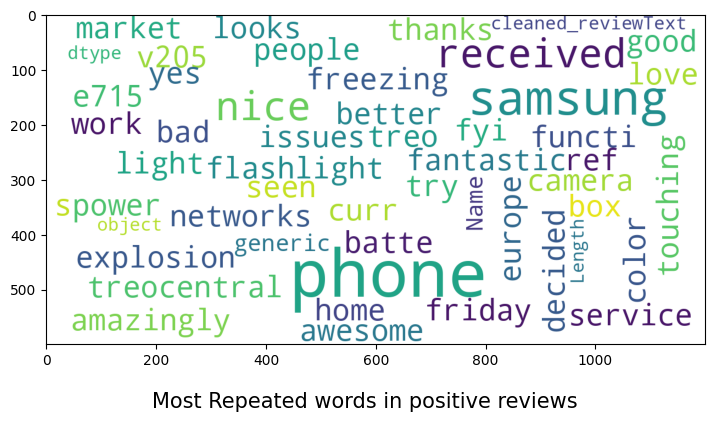

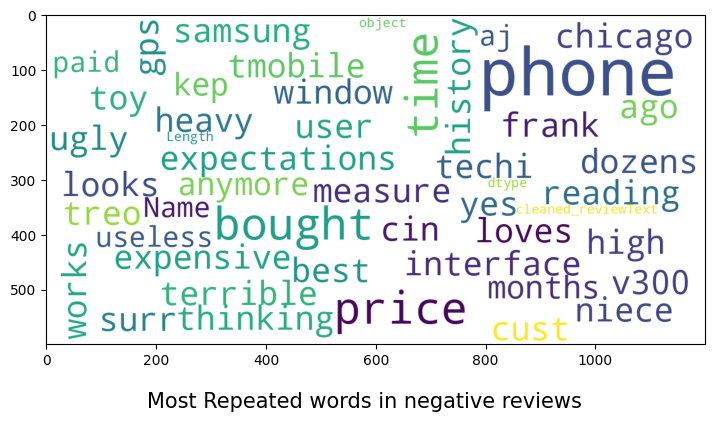

In [97]:
# Generating wordcloud based on category
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [99]:
df_phonedata_cleaned.head(2)

,overall,verified,reviewerID,asin,reviewText,asin.1,unixReviewTime,category,also_view,brand,price,review_sentiment,cleaned_reviewText,review_sentiment_numeric
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,This phone is ugly and heavy and has a terribl...,B0000E3GWH,1095724800,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,NEGATIVE,phone ugly heavy terrible user interface techi...,2
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,I had the Samsung V205 and then I decided to t...,B0000E3GWH,1090627200,"['Cell Phones & Accessories', 'Cell Phones', '...",[],Samsung,NaN,POSITIVE,samsung v205 decided try e715 fyi people batte...,1


In [100]:
df_phonedata_cleaned['word_count'] = df_phonedata_cleaned["reviewText"].apply(lambda x: len(str(x).split(" ")))
df_phonedata_cleaned['review_len'] = df_phonedata_cleaned["reviewText"].apply(lambda x: len(str(x)))

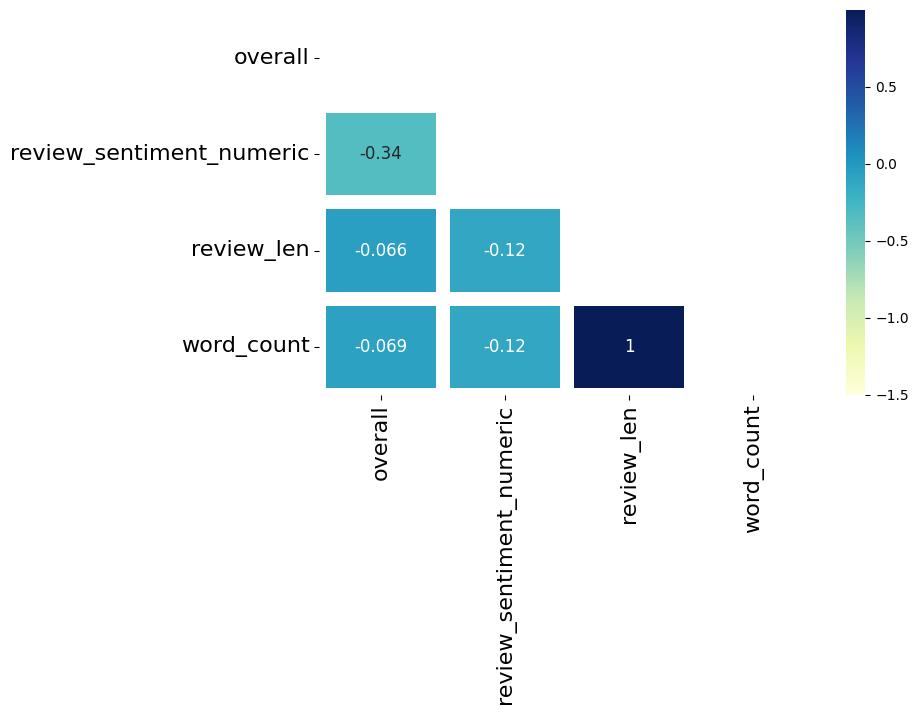

In [101]:
# Convert sentiment to numeric values
df_phonedata_cleaned['review_sentiment_numeric'] = phone_data['review_sentiment'].map({'POSITIVE': 1, 'NEGATIVE': 2})

# Visualizing the heatmap
correlation = df_phonedata_cleaned[['overall', 'review_sentiment_numeric', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)
plt.show()

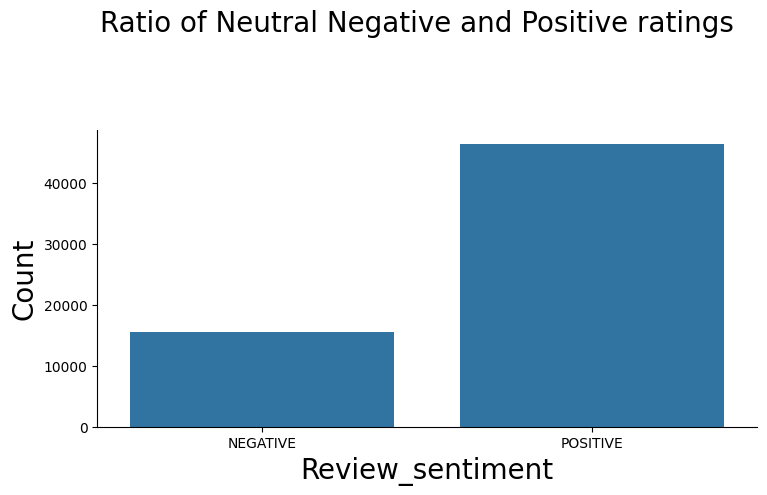

In [102]:
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(8,5))
fig.suptitle("Ratio of Neutral Negative and Positive ratings", fontsize = 20)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "review_sentiment", data = df_phonedata_cleaned)
axes.set_xlabel("Review_sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

We can see that the overall count of positive review is higher


## **III. Building a Naive Bayes model**
Covert the textual data to numerical features which can later be used to train any ML/AI model. Here we implement the Bag of Words method to extract features out of the text using CountVectorizer.

In [103]:
# Defining X and y as lists for training the model
X = review_df['cleaned_reviewText'].to_list()
y = review_df['binary_review_sentiment'].to_list()

# Model 1




In [104]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [105]:
# Distribution of the data.
print(pd.Series(y).value_counts())#Distribution of the data.
print(pd.Series(y).value_counts())

1    46370
0    15572
Name: count, dtype: int64
1    46370
0    15572
Name: count, dtype: int64


In [106]:
# Distribution of the data in terms of proportions.
print("Percent of 1s: ", 100*pd.Series(y).value_counts()[1]/pd.Series(y).value_counts().sum(), "%")
print("Percent of 0s: ", 100*pd.Series(y).value_counts()[0]/pd.Series(y).value_counts().sum(), "%")

Percent of 1s:  74.86035323367021 %
Percent of 0s:  25.139646766329793 %


In [107]:
# Convert text to features
# Creating an object of CountVectorizer - vect
vect = CountVectorizer()

In [108]:
vect.fit(X_train)

CountVectorizer()

In [109]:
# Printing the vocabulary
vect.vocabulary_

{'amazingly': 3577,
 'product': 24876,
 'works': 35105,
 'perfectly': 23544,
 'recommend': 26089,
 'size': 28864,
 'weight': 34603,
 'starter': 30013,
 'lots': 19438,
 'people': 23495,
 'like': 19081,
 'women': 35029,
 'wear': 34539,
 'phone': 23742,
 'pockets': 24191,
 'nokia': 21852,
 '20': 669,
 'appeal': 3959,
 'larger': 18676,
 'audience': 4467,
 'stands': 29986,
 'good': 14934,
 'geeks': 14568,
 'palms': 23124,
 'baggy': 5233,
 'clothes': 7902,
 'excelente': 12581,
 'exelent': 12684,
 'wait': 34315,
 'time': 31910,
 'posted': 24391,
 'crazy': 9183,
 'weeks': 34593,
 'ship': 28477,
 'package': 23047,
 'drove': 11295,
 'house': 16307,
 'twice': 32762,
 'miles': 20484,
 'ups': 33560,
 '35': 1239,
 'local': 19284,
 'post': 24388,
 'office': 22281,
 'times': 31924,
 'traveling': 32443,
 'packaging': 23051,
 'nice': 21716,
 'blu': 6054,
 'packaged': 23048,
 'products': 24885,
 'am': 3554,
 'feels': 13301,
 'lite': 19182,
 'cons': 8621,
 'screen': 27927,
 'protector': 25068,
 'crinkled'

In [110]:
# Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [111]:
# Training the NB model and making predictions
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# Predict sentiment
y_pred = mnb.predict(X_test_transformed)

# Predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [112]:
# Note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

### Model evaluation on the test data set

In [113]:
# Printing the overall accuracy
print("Accuracy for train set is: ", metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy for test set is: ", metrics.accuracy_score(y_test, y_pred))

Accuracy for train set is:  0.8833735147236095
Accuracy for test set is:  0.8672349218649102


Confusion matrix for train and test set


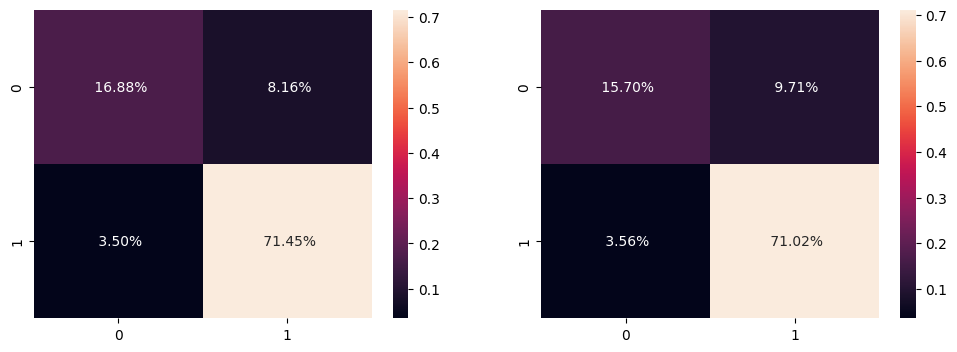

In [114]:
# Confusion matrix for the train data
print("Confusion matrix for train and test set")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# confusion matrix for train set
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%')
# help(metrics.confusion_matrix)

plt.subplot(1,2,2)
# confusion matrix for the test data
cm_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%')

plt.show()

Confusion Matrix is a tool to determine the performance of classifier. It contains information about actual and predicted classifications. Figure below gives a glimpse of a confusion matrix

In [115]:
# Storing the values in variables

# For train set
TN_tr = cm_train[0, 0]
FP_tr = cm_train[0, 1]
FN_tr = cm_train[1, 0]
TP_tr = cm_train[1, 1]

# For test set
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TP = cm_test[1, 1]

For this particular problem, the metrics that have been chosen are sensitivity and specificity. The reason being, you do not want to make the same mistake as your competitor that had resulted in a negative sentiment of the customer (specificity), and at the same time your product should also cover the aspects that have resulted in positive sentiment for the competitor products (sensitivity)

In [116]:
# Creating an ROC curve

# For train set
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

# For test set
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [117]:
# Area under the curve
print ("for train set: ",roc_auc_tr)
print ("for test set: ",roc_auc)

for train set:  0.9253837493378014
for test set:  0.9028354758385246


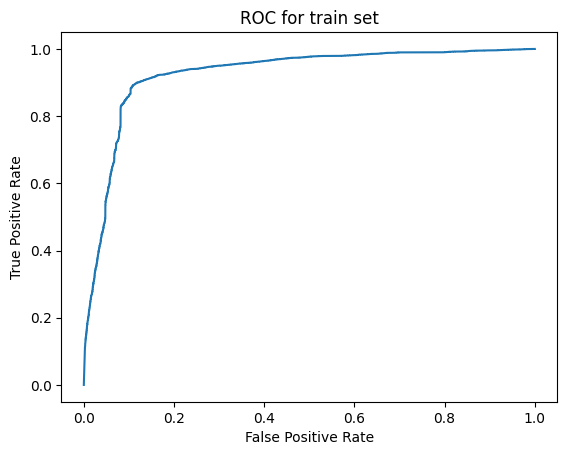

In [118]:
# Plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for train set')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

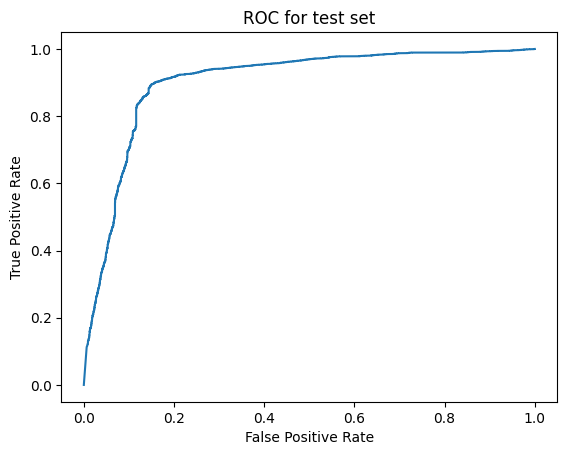

In [119]:
# Plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC for test set')
plt.plot(false_positive_rate, true_positive_rate)

In [120]:
# Calculating the Sensitivity for train and test set
sensitivity_tr = TP_tr / float(FN_tr + TP_tr)
print("sensitivity for train set: ",sensitivity_tr)
sensitivity = TP / float(FN + TP)
print("sensitivity for test set: ",sensitivity)

sensitivity for train set:  0.9533314187248708
sensitivity for test set:  0.9522077922077922


In [121]:
# Specificity for test and train set.
specificity_tr = TN_tr / float(TN_tr + FP_tr)
print("specificity for train set: ",specificity_tr)
specificity = TN / float(TN + FP)
print("specificity for test set: ",specificity)

specificity for train set:  0.6740288759023719
specificity for test set:  0.6178861788617886



Since the distribution of the dataset is imbalanced with more positives, many reviews which were negative were incorrectly classified as positives by the NB model and hence the low specificity. From a business point of view, this is not a very good model as you will miss out on the negatives of your competitors. Knowing the weaknesses of your competitors help you design better features for the product and devise your marketing strategies accordingly.

In [122]:
# Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred))

report for train set
              precision    recall  f1-score   support

           0       0.83      0.67      0.74     11636
           1       0.90      0.95      0.92     34820

    accuracy                           0.88     46456
   macro avg       0.86      0.81      0.83     46456
weighted avg       0.88      0.88      0.88     46456

report for test set
              precision    recall  f1-score   support

           0       0.82      0.62      0.70      3936
           1       0.88      0.95      0.91     11550

    accuracy                           0.87     15486
   macro avg       0.85      0.79      0.81     15486
weighted avg       0.86      0.87      0.86     15486



# Model 2: With Oversampling



In [123]:
# Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [124]:
pd.Series(y_train).value_counts()

,count
1,34820
0,11636


In [125]:
ros = over_sampling.RandomOverSampler(random_state=0)

In [126]:
X_train, y_train = ros.fit_resample(pd.DataFrame(X_train), pd.Series(y_train))

In [127]:
pd.Series(y_train).value_counts()

,count
1,34820
0,34820


In [128]:
# Distribution of the data in terms of proportions can now be seen as 50 -50
print("Percent of 1s: ", 100*pd.Series(y_train).value_counts()[1]/pd.Series(y_train).value_counts().sum(), "%")
print("Percent of 0s: ", 100*pd.Series(y_train).value_counts()[0]/pd.Series(y_train).value_counts().sum(), "%")

Percent of 1s:  50.0 %
Percent of 0s:  50.0 %


In [129]:
# Vectorizing the sentences
vect = CountVectorizer()

In [130]:
# The CountVectorizer object, vect takes in a list of string as an argument. to get a list of string from a 2D array,
# We convert the 2D array to a dataframe and then convert it to a list.

X_train = pd.DataFrame(X_train).iloc[:,0].tolist()

# Printing a few samples from the list
X_train[:6]

['amazingly product works perfectly recommend',
 'size weight starter lots people like women wear phone pockets nokia phone 20 appeal larger audience stands good geeks palms baggy clothes',
 'excelente',
 'exelent',
 'wait time posted crazy wait weeks ship package drove house twice miles ups 35 miles local post office times traveling miles house packaging nice blu packaged products am phone feels lite nice cons screen protector crinkled bubbles data claimed 4g straight talk 3g 4 4 2 kitkat os not blu phones os battery sucks phone getting hot minutes booting like android 4 0 4 4 2',
 'good smart phone price elegant fast good set applications good screen size easy recommend']

In [131]:
# Fitting X_train into a vectorizer
vect.fit(X_train)

CountVectorizer()

In [132]:
# Transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

## Naive Bayes model with random oversampling


In [133]:
# Training the NB model and making predictions
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# Training dataset
y_pred_train = mnb.predict(X_train_transformed)
y_pred_proba_tr = mnb.predict_proba(X_train_transformed)

# Testing dataset
y_pred = mnb.predict(X_test_transformed)
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [134]:
# Note that alpha=1 is used by default for smoothing
mnb

MultinomialNB()

## Model evaluation on the test data set

In [135]:
# Printing the overall accuracy
print("Accuracy for test set is: ", metrics.accuracy_score(y_test, y_pred))
print("Accuracy for train set is: ", metrics.accuracy_score(y_train, y_pred_train))

Accuracy for test set is:  0.8780834301950149
Accuracy for train set is:  0.893423319931074


Confusion matrix for train and test set


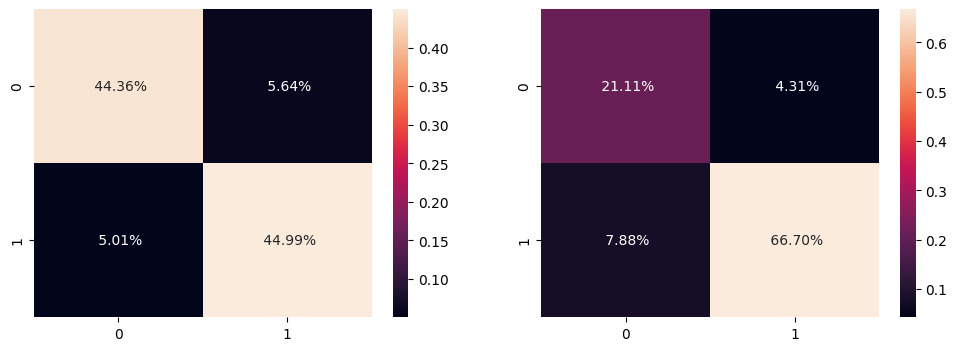

In [136]:
# Confusion matrix for the train data
print("Confusion matrix for train and test set")

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
# confusion matrix for train set
cm_train = metrics.confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm_train/np.sum(cm_train), annot=True , fmt = ' .2%')
# help(metrics.confusion_matrix)

plt.subplot(1,2,2)
# confusion matrix for the test data
cm_test = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm_test/np.sum(cm_test), annot=True , fmt = ' .2%')

plt.show()

In [137]:
# Creating an ROC curve
# For test set
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
# For train set
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate, true_positive_rate)

In [138]:
# Area under the curve
print ("for train set: ",roc_auc_tr)
print ("for test set: ",roc_auc)

for train set:  0.90247866293598
for test set:  0.90247866293598


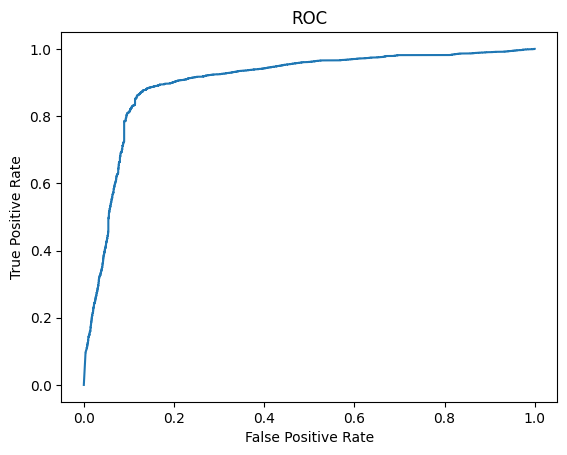

In [139]:
# Plotting the ROC curve
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

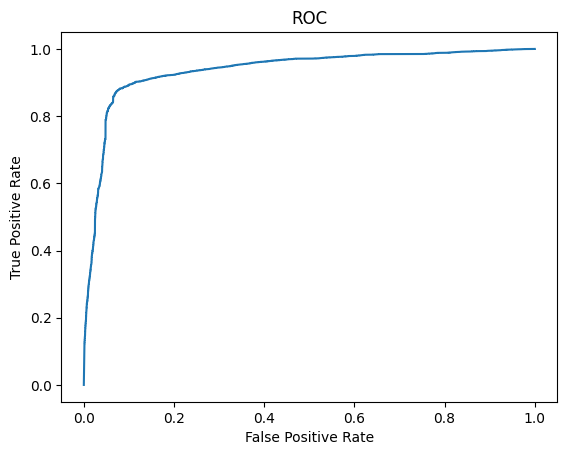

In [140]:
# Plotting the ROC curve
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

In [141]:
# Storing the values in variables for test set
TN = cm_test[0, 0]
FP = cm_test[0, 1]
FN = cm_test[1, 0]
TP = cm_test[1, 1]
#For train set
TN_tr = cm_train[0, 0]
FP_tr = cm_train[0, 1]
FN_tr = cm_train[1, 0]
TP_tr = cm_train[1, 1]

In [142]:
# Specificity for test and train set.
specificity_tr = TN_tr / float(TN_tr + FP_tr)
print("specificity for train set: ",specificity_tr)
specificity = TN / float(TN + FP)
print("specificity for test set: ",specificity)

specificity for train set:  0.8871338311315337
specificity for test set:  0.8305386178861789


In [143]:
# Calculating the Sensitivity for train and test set
sensitivity_tr = TP_tr / float(FN_tr + TP_tr)
print("sensitivity for train set: ",sensitivity)
sensitivity = TP / float(FN + TP)
print("sensitivity for test set: ",sensitivity)

sensitivity for train set:  0.9522077922077922
sensitivity for test set:  0.8942857142857142


The test sensitivity and specificity of the model without oversampling were 0.95 and 0.61 respectively. The application of oversampling model has resulted in an equal distribution of the binary labels. This has resulted in a jump in specificity by 0.21 with a slight decrease in the sensitivity by 0.06. From a business point of view, we can say that this is a better model as compared to the one that was built without oversampling.







In [144]:
# Printing the classufication report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred))

report for train set
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     34820
           1       0.89      0.90      0.89     34820

    accuracy                           0.89     69640
   macro avg       0.89      0.89      0.89     69640
weighted avg       0.89      0.89      0.89     69640

report for test set
              precision    recall  f1-score   support

           0       0.73      0.83      0.78      3936
           1       0.94      0.89      0.92     11550

    accuracy                           0.88     15486
   macro avg       0.83      0.86      0.85     15486
weighted avg       0.89      0.88      0.88     15486

